       0              1             2              3           4           5  \
0    0.0 -175680.937500  35128.644531 -140552.296875  309.853302   84.967438   
1  100.0 -175387.062500  35737.015625 -139650.046875  315.219452  116.084549   
2  200.0 -175059.531250  35401.789062 -139657.750000  312.262573  -85.727356   
3  300.0 -175760.984375  35717.289062 -140043.687500  315.045502  269.017548   
4  400.0 -174898.718750  35252.562500 -139646.156250  310.946320 -129.284088   

            6  
0  137.956879  
1  137.819077  
2  137.437531  
3  135.811859  
4  137.846680  


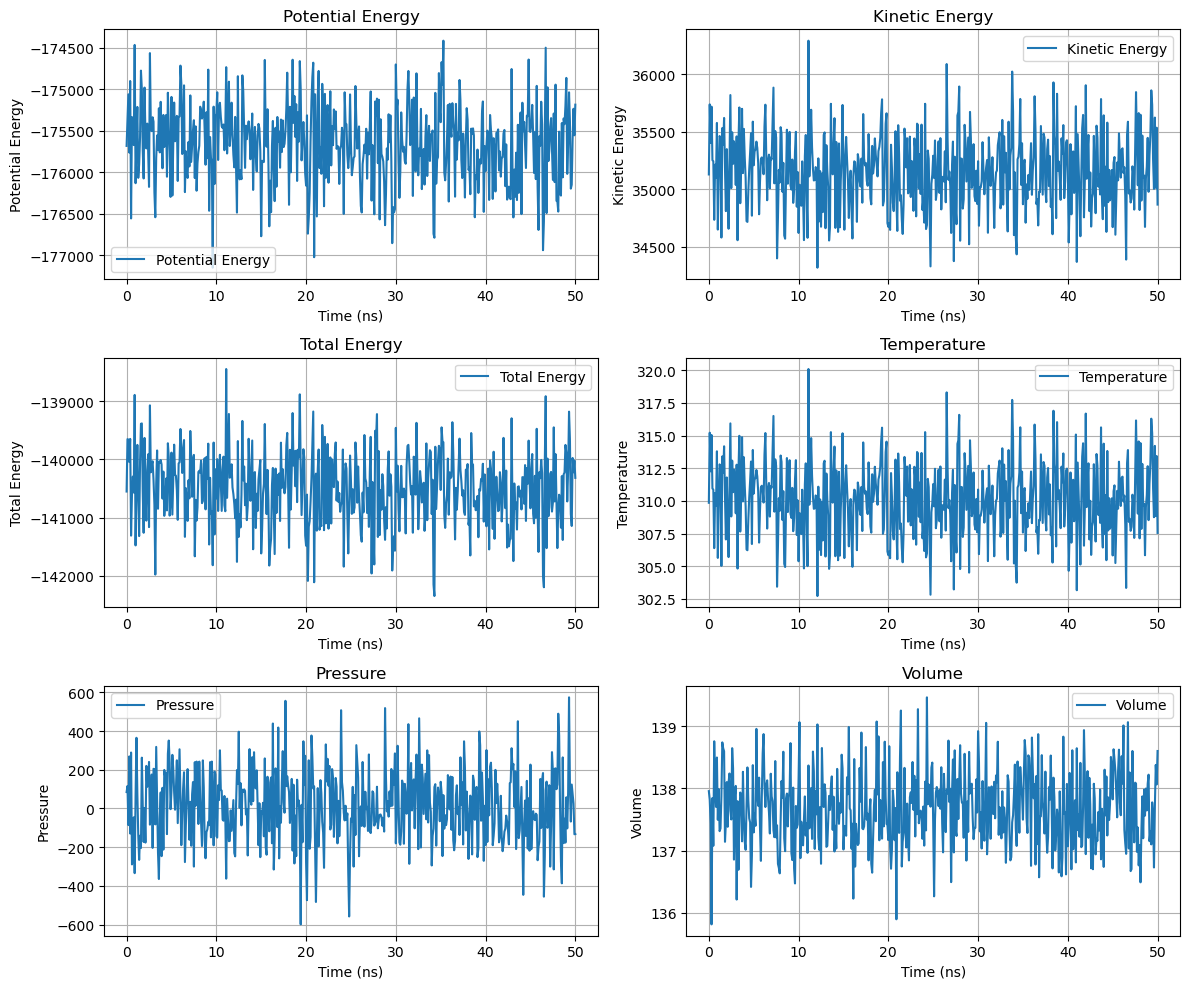

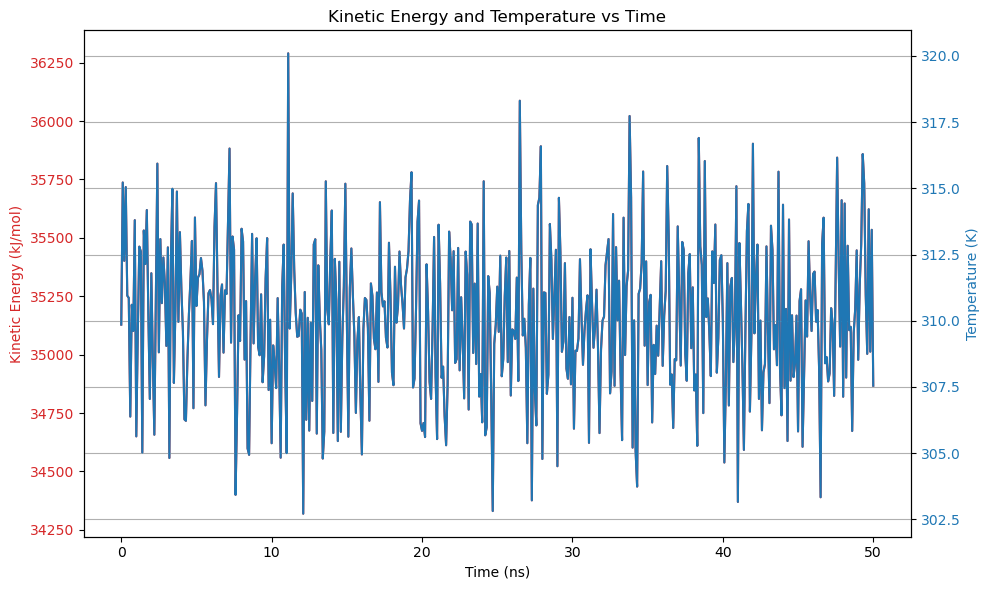

In [1]:
# First, import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# a) Reading the Data File
# Provide the correct path to the file
file_path = 'Data/1hz3_T310.run.25000000.energy.xvg'

# Read the file and handle the comment lines starting with '#'
with open(file_path, 'r') as file:
    # Skip the commented lines and unnecessary headers
    file_content = [line for line in file if not line.startswith('#') and not line.startswith('@')]

# Convert the list of lines into a string for StringIO
file_content = "\n".join(file_content)

# Load the data into a pandas DataFrame
# Assuming columns are space-separated; if tab-separated, adjust accordingly
data = pd.read_csv(StringIO(file_content), delim_whitespace=True, header=None)

# Inspect the data
print(data.head())

# The first column is Time (ps), followed by different quantities
# Naming the columns for easier reference:
columns = ['Time (ps)', 'Potential Energy', 'Kinetic Energy', 'Total Energy', 'Temperature', 'Pressure', 'Volume']
data.columns = columns

# Convert time from ps to ns for plotting
data['Time (ns)'] = data['Time (ps)'] / 1000  # 1 ns = 1000 ps

# b) Making Separate Plots for Each Quantity vs Time
# Define the quantities to plot (excluding Time and ps units)
quantities = ['Potential Energy', 'Kinetic Energy', 'Total Energy', 'Temperature', 'Pressure', 'Volume']

# Create a plot for each quantity
plt.figure(figsize=(12, 10))
for i, quantity in enumerate(quantities, 1):
    plt.subplot(3, 2, i)
    plt.plot(data['Time (ns)'], data[quantity], label=quantity)
    plt.title(quantity)
    plt.xlabel('Time (ns)')
    plt.ylabel(quantity)
    plt.grid()
    plt.legend()

plt.tight_layout()
plt.show()

# c) Plot Kinetic Energy and Temperature on the Same Plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot kinetic energy on the left y-axis
ax1.set_xlabel('Time (ns)')
ax1.set_ylabel('Kinetic Energy (kJ/mol)', color='tab:red')
ax1.plot(data['Time (ns)'], data['Kinetic Energy'], color='tab:red', label='Kinetic Energy')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature (K)', color='tab:blue')
ax2.plot(data['Time (ns)'], data['Temperature'], color='tab:blue', label='Temperature')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Title and grid
plt.title('Kinetic Energy and Temperature vs Time')
fig.tight_layout()  # Adjust layout to prevent overlap
plt.grid()
plt.show()

In [2]:
import mdtraj as md

# Load structure
traj = md.load('Data/1iyt.pdb')

# Save as .xtc with multiple identical frames for testing
traj = traj.join([traj]*10)  # Join 10 copies of the single frame
traj.save_xtc('Data/beta_amyloid.xtc')

# Import necessary libraries
import numpy as np

# a) Read in the Ubiquitin Structure
# Replace 'ubiquitin.pdb' with the actual path to your PDB file
structure_file = 'Data/1UBQ.pdb'
trajectory = md.load(structure_file)

# Print the trajectory information
print(f"Loaded {structure_file} with {trajectory.n_atoms} atoms and {trajectory.n_residues} residues.")

# b) Print the Total Number of Hydrogen Bonds
# mdtraj's 'hbonds' function calculates hydrogen bonds.
# Using a distance cut-off of 0.35 nm (3.5 Ã…) and an angle cut-off of 30 degrees
hbonds = md.baker_hubbard(trajectory, periodic=False)

# Print the total number of hydrogen bonds
print(f"Total number of hydrogen bonds: {len(hbonds)}")

# Optional: Print details of the hydrogen bonds
for hbond in hbonds:
    donor_index, hydrogen_index, acceptor_index = hbond
    donor_residue = trajectory.topology.atom(donor_index).residue
    acceptor_residue = trajectory.topology.atom(acceptor_index).residue
    print(f"Hydrogen bond: {donor_residue} (donor) -> {acceptor_residue} (acceptor)")

# c) Compute the Number of Helical Amino Acids
# Use mdtraj's built-in function to compute secondary structure
secondary_structure = md.compute_dssp(trajectory)

# Extract helices (denoted by 'H' in DSSP)
helical_amino_acids = np.sum(secondary_structure == 'H')

# Print the number of helical amino acids
print(f"Number of helical amino acids: {helical_amino_acids}")

Loaded Data/1UBQ.pdb with 660 atoms and 134 residues.
Total number of hydrogen bonds: 0
Number of helical amino acids: 18


In [4]:
import mdtraj as md

# Load structure
traj = md.load('Data/1iyt.pdb')

# Save as .xtc with multiple identical frames for testing
traj = traj.join([traj]*10)  # Join 10 copies of the single frame
traj.save_xtc('Data/beta_amyloid.xtc')


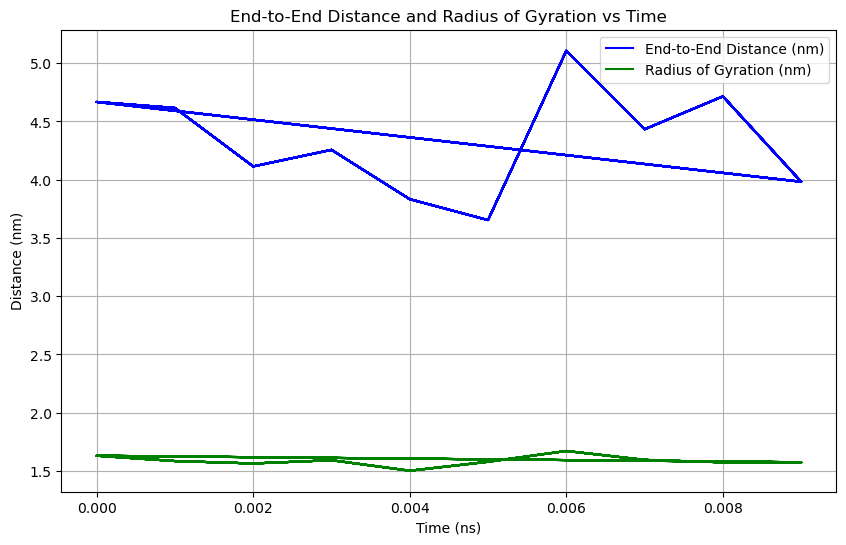

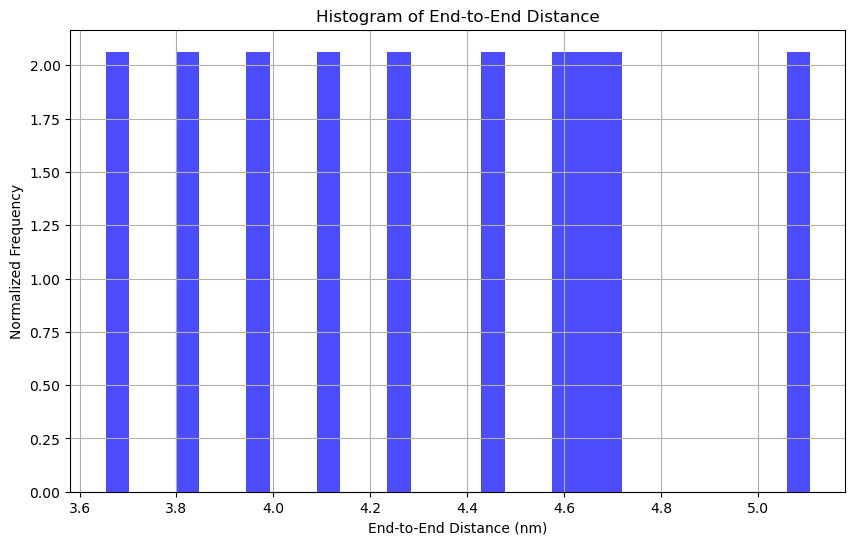

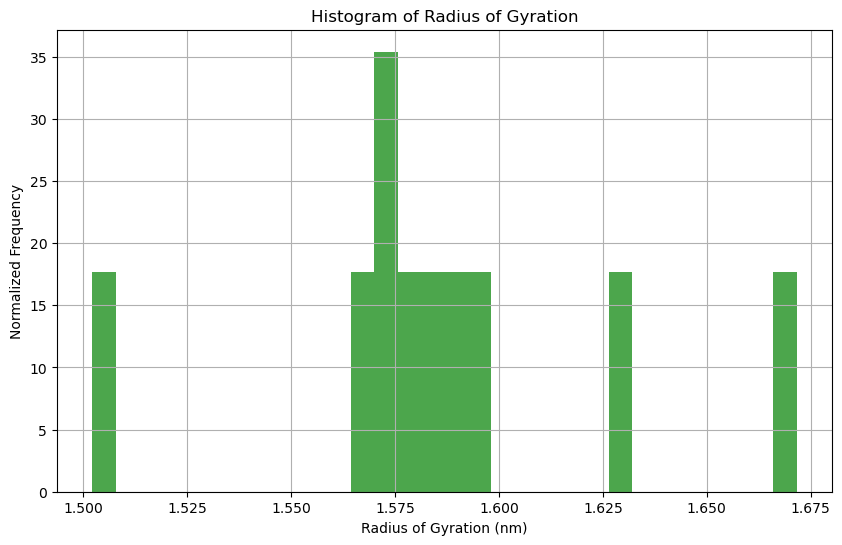

In [5]:
# Import necessary libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# Load trajectory and topology
traj = md.load('Data/beta_amyloid.xtc', top='/home/sa8200/comp-lab-class/comp-lab-class-2024/Week2-DataAnalysis/Data/1iyt.pdb')

# (a) Load the trajectory of beta-amyloid
# Assume the file names and adjust paths if needed

# Get time in nanoseconds
time = traj.time / 1000  # convert from picoseconds to nanoseconds

# (b) Calculate end-to-end distance and radius of gyration
# End-to-end distance: distance between the first and last residues
end_to_end_distances = md.compute_distances(traj, [[0, traj.n_atoms - 1]])[:, 0]

# Radius of gyration
radii_of_gyration = md.compute_rg(traj)

# (c) Plot end-to-end distance and radius of gyration vs time on the same plot
plt.figure(figsize=(10, 6))
plt.plot(time, end_to_end_distances, label='End-to-End Distance (nm)', color='blue')
plt.plot(time, radii_of_gyration, label='Radius of Gyration (nm)', color='green')
plt.xlabel('Time (ns)')
plt.ylabel('Distance (nm)')
plt.title('End-to-End Distance and Radius of Gyration vs Time')
plt.legend()
plt.grid()
plt.show()

# (d) Plot normalized histograms of end-to-end distance and radius of gyration

# Histogram for end-to-end distance
plt.figure(figsize=(10, 6))
plt.hist(end_to_end_distances, bins=30, density=True, color='blue', alpha=0.7)
plt.xlabel('End-to-End Distance (nm)')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of End-to-End Distance')
plt.grid()
plt.show()

# Histogram for radius of gyration
plt.figure(figsize=(10, 6))
plt.hist(radii_of_gyration, bins=30, density=True, color='green', alpha=0.7)
plt.xlabel('Radius of Gyration (nm)')
plt.ylabel('Normalized Frequency')
plt.title('Histogram of Radius of Gyration')
plt.grid()
plt.show()